In [1]:
%pylab notebook
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
def find_FI_analytically(showplot=True):

    R = 40e-3
    tau_m = 10.
    theta = 15.
    I = np.linspace(theta / R, 700, 1000)
    F = 1000 / (tau_m * np.log(1 / (1 - theta / (R * I))))  # Firing rate in spikes / s
    if showplot:
        figure()
        xticks([])
        yticks([])
        plot(I, F, 'k')
        xlabel('Input current [pA]')
        ylabel('Firing rate [spikes / s]')
        xlim(200, 700)
        savefig('exercise_2_1.png')
    return I, F

In [3]:
def find_firing_rate_numerically(I0=400, showplot=True, noisy=False):

    R = 40e-3
    tau_m = 10.
    theta = 15.
    h = 0.1
    T = 1000
    v_init = 0
    v_reset = 0
    num_tsteps = int(T / h + 1)
    t = np.linspace(0, T, num_tsteps)
    v = np.zeros(num_tsteps)
    v[0] = v_init
    spike_idxs = []
    if noisy:
        I = I0 * (np.ones(num_tsteps) + np.random.normal(0, 0.4, size=num_tsteps))
    else:
        I = I0 * np.ones(num_tsteps)

    for n in range(num_tsteps - 1):
        v[n + 1] = v[n] + h / tau_m * (-v[n] + R * I[n])
        if v[n + 1] >= theta:
            v[n + 1] = v_reset
            spike_idxs.append(n + 1)
    if showplot:
        figure()
        plot(t, v)
        plot(t[spike_idxs], (theta + 1) * np.ones(len(spike_idxs)), '*', ms=10)
        ylim([0, 18])
        xlabel('Time [ms]')
        ylabel('Membrane potential')
        savefig('exercise_2_3.png')
    return len(spike_idxs) / (T / 1000.)

In [4]:
def exercise_2_4():
    Is = np.linspace(200, 700, 200)
    F_clean = np.zeros(len(Is))
    F_noisy = np.zeros(len(Is))

    for idx in range(len(Is)):
        F_clean[idx] = find_firing_rate_numerically(I0=Is[idx], showplot=False)
        F_noisy[idx] = find_firing_rate_numerically(I0=Is[idx], showplot=False, noisy=True)

    I, F = find_FI_analytically(showplot=False)

    figure()
    plot(Is, F_clean, label='Clean numerical', lw=2)
    plot(Is, F_noisy, label='Noisy numerical', lw=2)
    plot(I, F, '--', label='Analytic', lw=2)

    xlabel('Input current [pA]')
    ylabel('Firing rate [spikes / s]')
    legend(loc=0, frameon=False)
    xlim(200, 700)
    savefig('exercise_2_4.png')

In [5]:
def exercise_2_3():
    find_firing_rate_numerically(I0=400, showplot=True)

In [6]:
def exercise_2_1():
    find_FI_analytically(showplot=True)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


<IPython.core.display.Javascript object>


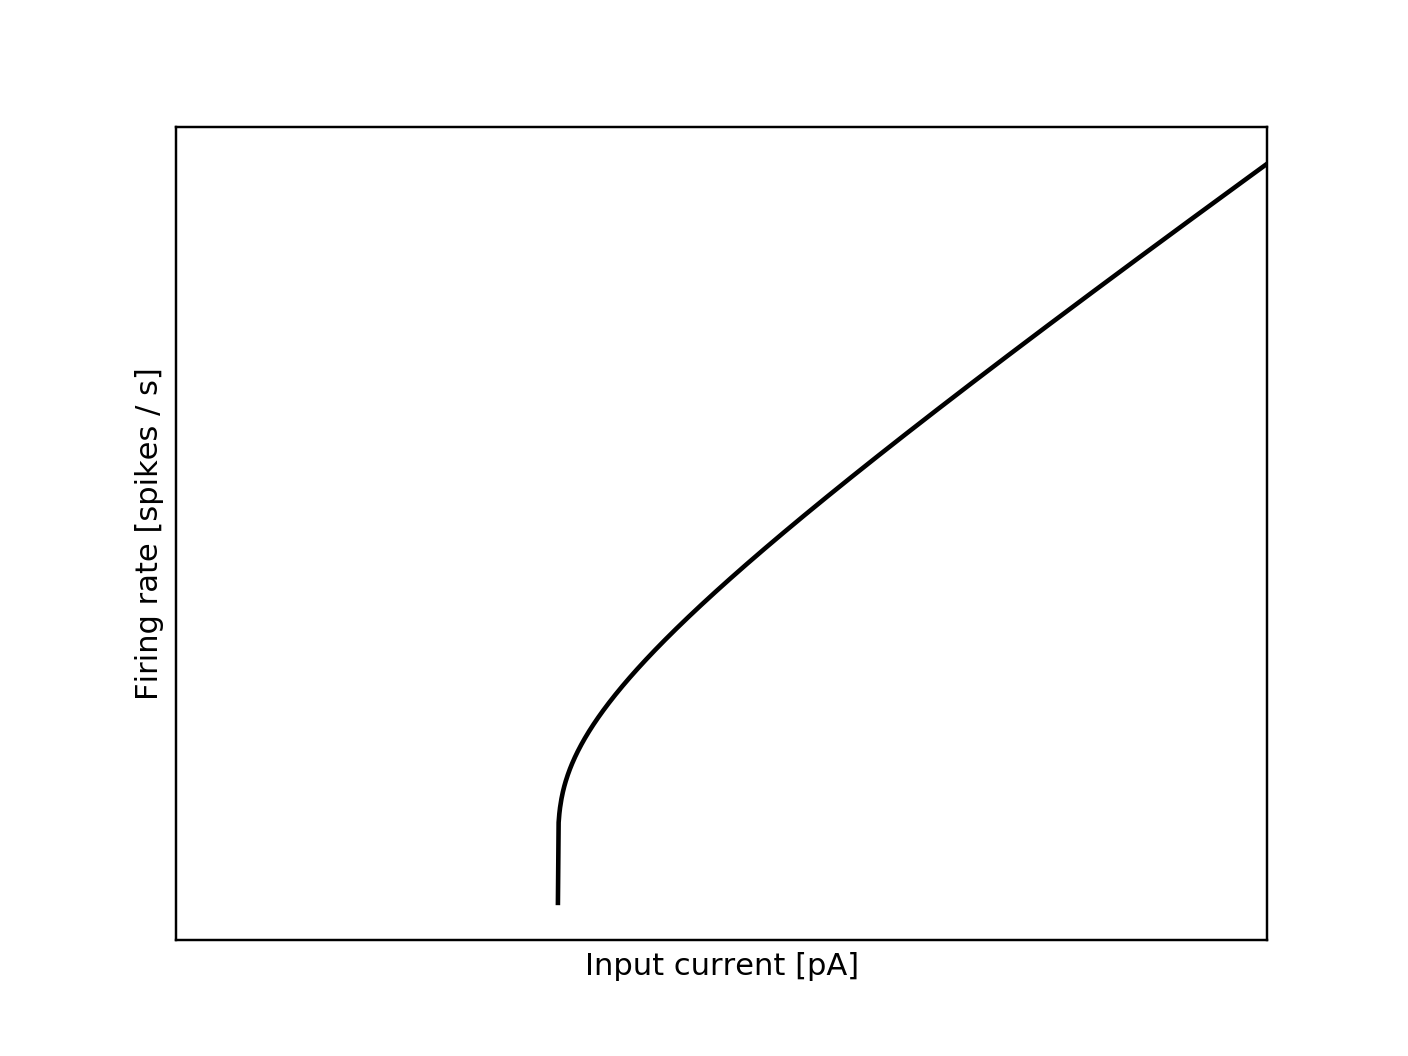

In [7]:
exercise_2_1()

<IPython.core.display.Javascript object>


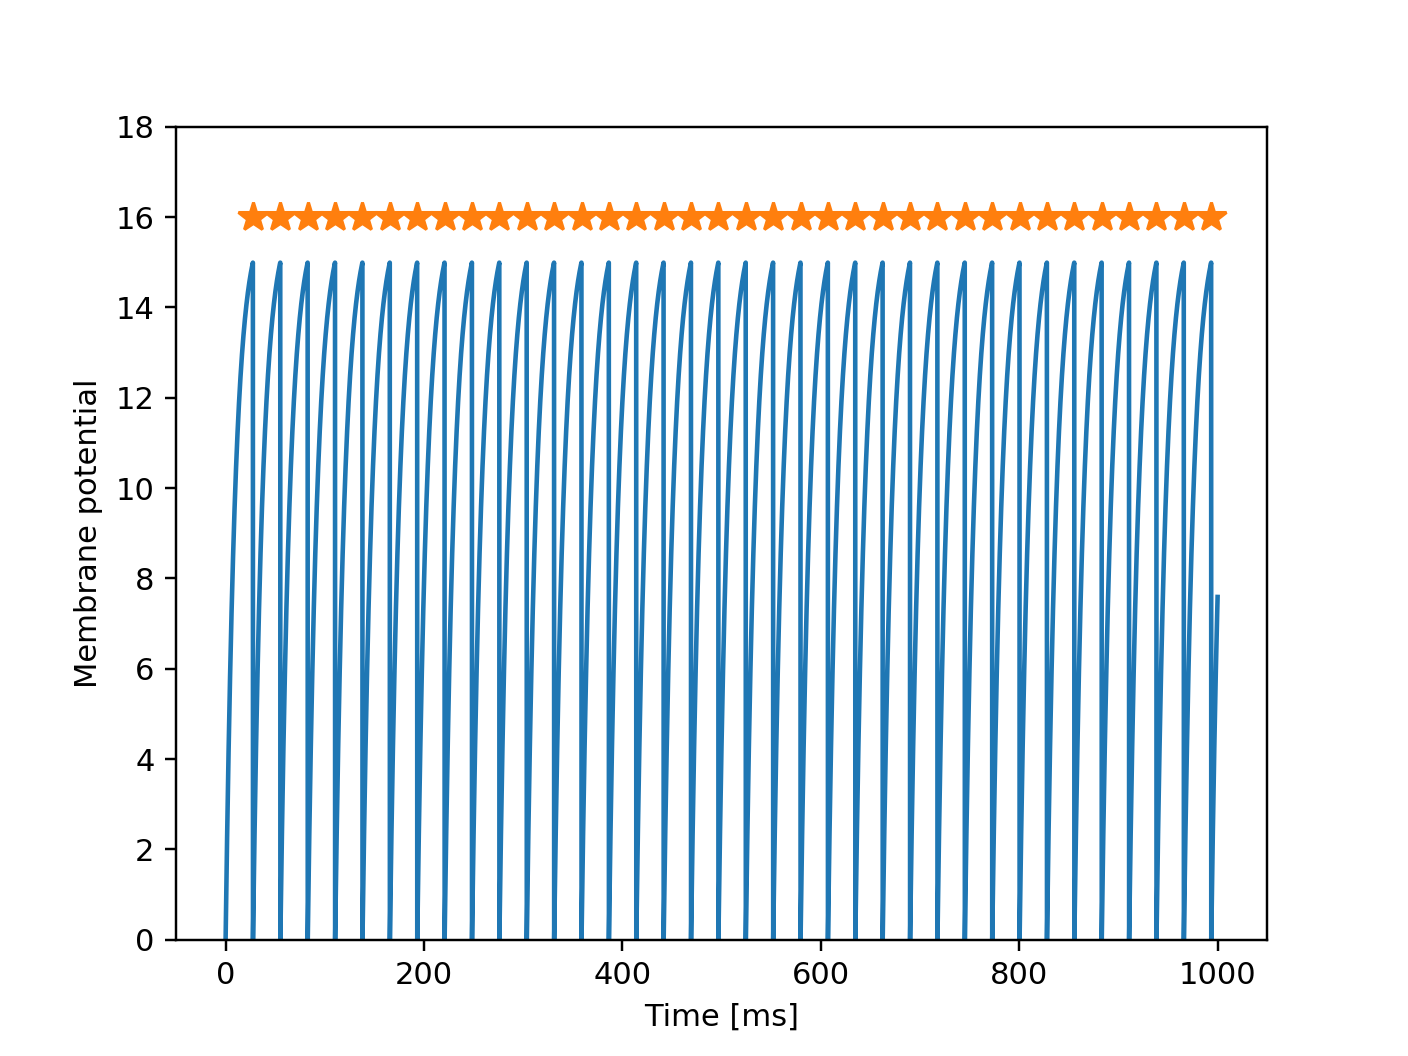

In [8]:
exercise_2_3()

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


<IPython.core.display.Javascript object>


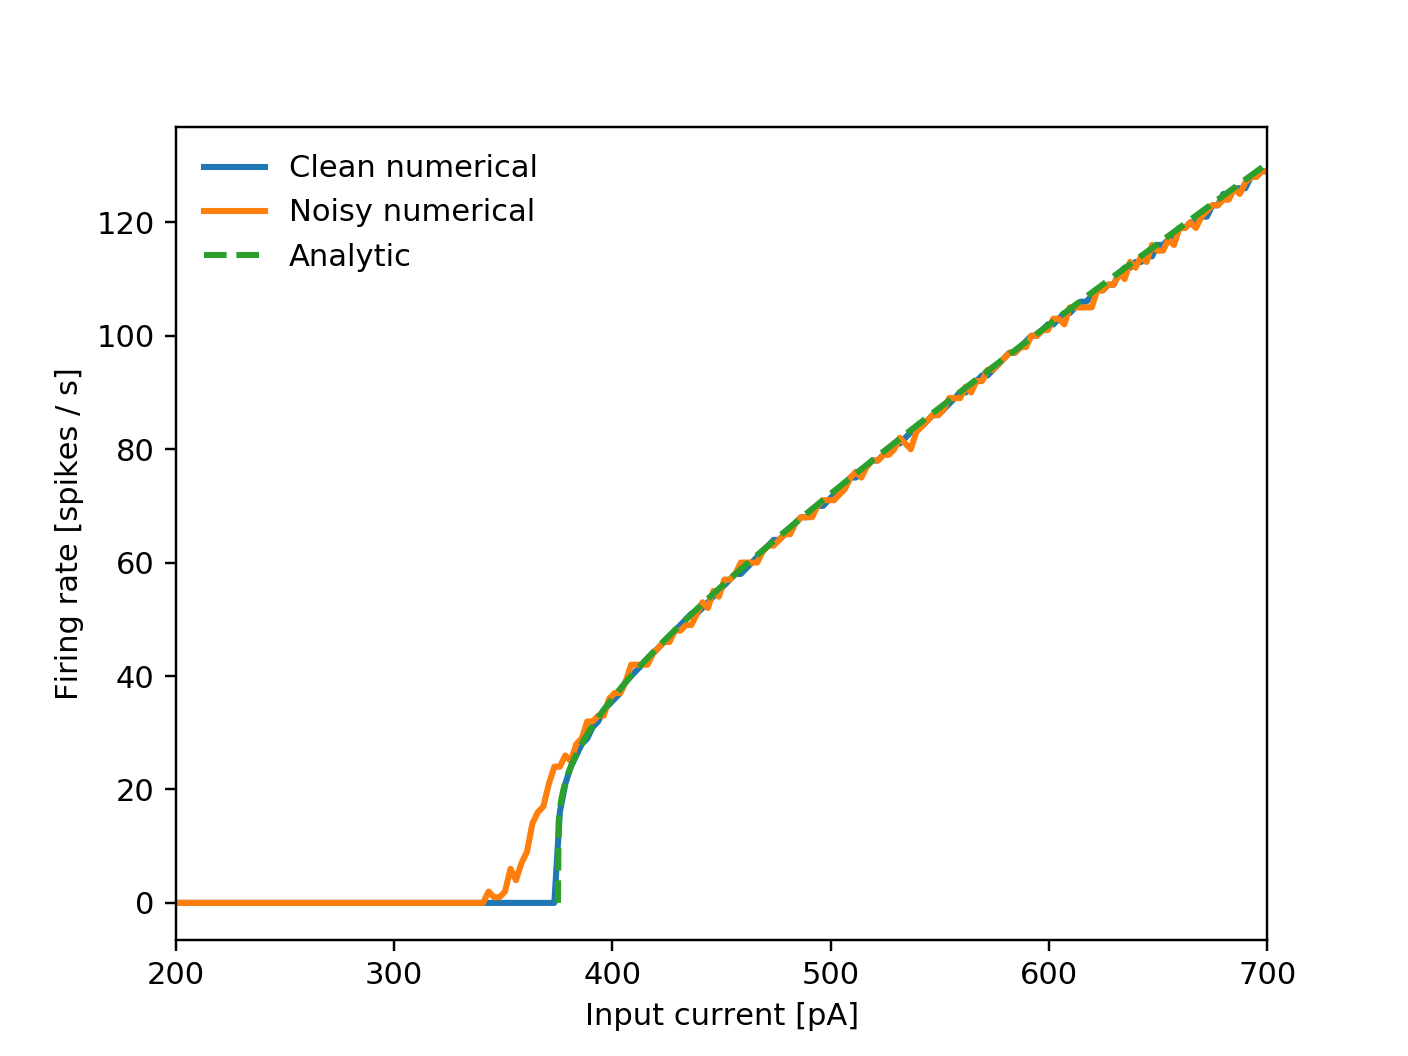

In [9]:
exercise_2_4()